In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

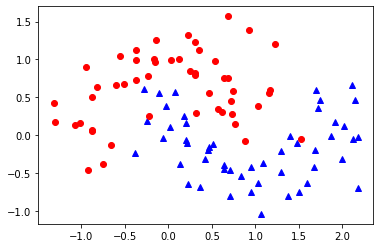

In [2]:
X,y = np.loadtxt(r'data/1x0.txt'), np.loadtxt(r'data/1y0.txt')
plt.plot(X[y==1,0], X[y==1,1], 'b^')
plt.plot(X[y!=1,0], X[y!=1,1], 'ro')

In [3]:
'''数据分组，预处理（-1～1之间）'''
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.1)
aver = Xtrain.mean(axis=0)
Xtrain -= aver
Xtemp = np.abs(Xtrain)
colmax = Xtemp.max(axis=0)
Xtrain /= colmax
Xtest -= aver
Xtest /= colmax

In [4]:
'''对分类信息正交化'''
labelstrain = []
for i in range(len(ytrain)):
    one = 2*[0]
    if ytrain[i]==0:
        one[0] = 1
    else:
        one[1] = 1
    labelstrain.append(one)
labelstrain = np.array(labelstrain)

In [5]:
'''建模'''
from NeuralNetwork import NeuralNetwork
nn = NeuralNetwork([X.shape[1], 100, labelstrain.shape[1]], 'logistic')
nn.fit(Xtrain, labelstrain, epochs=10000)

In [6]:
'''预测'''
predictions = nn.predict(Xtest)
print(predictions)
print(ytest)

[1, 1, 1, 0, 0, 0, 1, 0, 1, 0]
[1. 1. 1. 0. 1. 0. 1. 0. 0. 1.]


In [7]:
'''分类报告'''
from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

         0.0       0.60      0.75      0.67         4
         1.0       0.80      0.67      0.73         6

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10

